# Qiskit 소개
Qiskit을 사용하는 경우 사용자 워크플로우는 다음의 네 가지 상위 레벨 단계로 구성된다.

빌드: 사용자가 고려하고 있는 문제를 나타내는 양자 회로(들)을 설계한다.

컴파일: 특정 양자 서비스를 위한 회로를 컴파일한다 (예: 퀀텀 시스템 또는 고전 시뮬레이터).

Run: 지정된 퀀텀 서비스에서 컴파일된 회로를 실행한다. 이러한 서비스는 클라우드 기반 또는 로컬일 수 있습니다.

분석: 요약 통계를 계산하고 실험 결과를 시각화한다.

In [3]:
!pip install qiskit

In [9]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'00': 498, '11': 502}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

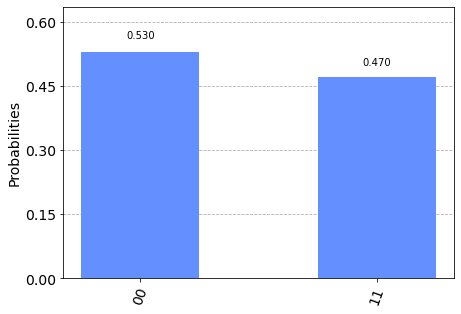

In [8]:
# Plot a histogram
plot_histogram(counts)